In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 5.3 MB/s eta 0:00:08
   ---------------------------------------- 0.5/38.8 MB 6.0 MB/s eta 0:00:07
    --------------------------------------- 0.7/38.8 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.0/38.8 MB 5.9 MB/s eta 0:00:07
   - -------------------------------------- 1.3/38.8 MB 6.0 MB/s eta 0:00:07
   - -------------------------------------- 1.7/38.8 MB 6.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.0/38.8 MB 6.4 MB/s eta 0:00:06
   -- ------------------------------------- 2.0/38.8 MB 5.9 MB/s eta 0:00:07
   -- ------------------------------------- 2.2/38.8 MB 5.3 MB/s eta 0:00:07
   -- ------------------------------------- 2.5/38.8 MB 5.4 MB/s eta 0:00:07
   -- ------------------------------------- 2.7/38.8 MB 5.4 MB/s eta 0:00:07
   -- ------------------------------------- 2.8/38.8 MB 5.1 MB/s eta 0:00:08
   ---

In [21]:
import requests
import json
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [31]:
# Custom Vision API credentials
prediction_key = "7bb901677f514c8e8595294c159523e9"
endpoint = "https://vishalcelebalassignment11-prediction.cognitiveservices.azure.com/customvision/v3.0/Prediction/3ef436f0-b228-4fd1-ad3c-5d43bab2e321/classify/iterations/Iteration2/image"


In [32]:
# Image path to be analyzed
image_path = "rainy.jpg"

# Open and read the image file
with open(image_path, 'rb') as image_file:
    image_data = image_file.read()

In [33]:
# Set headers and parameters for the API request
headers = {
    'Content-Type': 'application/octet-stream',
    'Prediction-Key': prediction_key
}
params = {
    'application': 'application/octet-stream'
}

In [34]:
# Send the image to the Custom Vision model
response = requests.post(endpoint, headers=headers, data=image_data)
predictions = response.json()

In [35]:
# Print the predictions
print("Predictions:")
for prediction in predictions['predictions']:
    print(f"Tag: {prediction['tagName']}, Confidence: {prediction['probability']}")

Predictions:
Tag: rain-weather, Confidence: 1.0
Tag: shine-weather, Confidence: 2.116725e-08
Tag: cloudy-weather, Confidence: 3.1497553e-09
Tag: sunrise-weather, Confidence: 7.404481e-10


In [36]:
# Analyze the color variations if a specific category is predicted
predicted_tag = predictions['predictions'][0]['tagName']
print(f"Analyzing color variations for: {predicted_tag}")

Analyzing color variations for: rain-weather


In [37]:
# Load the image using OpenCV
image = cv2.imread(image_path)

# Split the image into its color channels
channels = cv2.split(image)
colors = ('b', 'g', 'r')
channel_names = ('Blue', 'Green', 'Red')

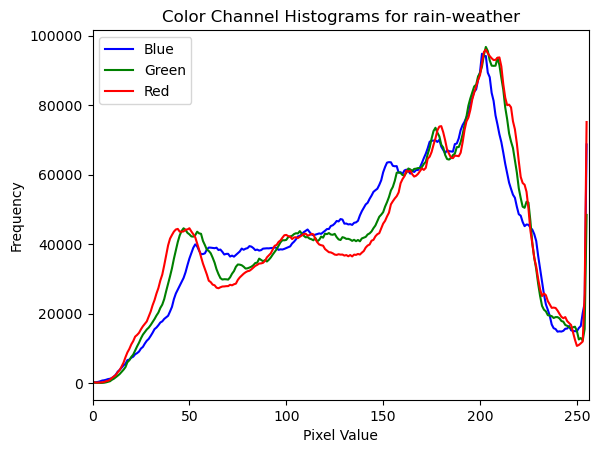

In [38]:
# Plot the histogram for each channel
plt.figure()
plt.title(f'Color Channel Histograms for {predicted_tag}')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

for (channel, color, name) in zip(channels, colors, channel_names):
    histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color, label=name)

plt.legend()
plt.xlim([0, 256])
plt.show()